**YOUR NAME**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 4a: Pandas and Principle Component Analysis

In [9]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [8,8]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 

## Task 1:  Introduction to Pandas

We are going to be using Pandas, covariance matrices and principle component analysis to explore a dataset on breast cancer diagnosis data. More information about the dataset can be found [here.](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from the url:  https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv 
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation:
    1. In one method call get the shape and print the results.
    2. To get the column headers and print them.
    3. In one method call get the first 5 items and print the results.
    4. Find the mean of each column
3. Create a `cancer_x` dataframe which includes columns 2-11 (radius_mean - fractal_dimension_mean).
4. Update `cancer_x` to be normalized from 0-1, by subtracting by the minimum and dividing by the range. 
5. Create a `cancer_y` series with from the column `diagnosis` and set it to be [lowercase](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.capitalize.html)


In [10]:
url="https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
ds = pd.read_csv("data.csv")
#print(ds)

data = pd.DataFrame(ds)

def print_size(df = pd.DataFrame()):
    print(df.shape)
    return df.shape
    
def print_headers(df = pd.DataFrame()):
    print(df.columns)
    return df.columns
    
def print_5items(df = pd.DataFrame()):
    print(df.head(5))
    return df.head(5)
    
def mean_col(df = pd.DataFrame()):
    mean = df.mean(axis=0)
    return mean
    
cancer_x = data[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"]]

cancer_x_min = cancer_x.min(axis=0)
cancer_x_max = cancer_x.max(axis=0)
cancer_x_range = cancer_x_max - cancer_x_min

cancer_x = cancer_x.subtract(cancer_x_min, axis = 1)
cancer_x = cancer_x.div(cancer_x_range, axis = 1)

cancer_y = pd.Series(data["diagnosis"])

cancer_y = cancer_y.str.lower()

print_size(cancer_x)
print_5items(cancer_x)
print_headers(cancer_x)
print(mean_col(cancer_x))

(569, 10)
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   fractal_dimension_mean  
0                0.605518  
1                0.141323 

In [11]:
arr = data.to_numpy()
print (arr)

[[842302 'M' 17.99 ... 0.4601 0.1189 nan]
 [842517 'M' 20.57 ... 0.275 0.08902 nan]
 [84300903 'M' 19.69 ... 0.3613 0.08757999999999999 nan]
 ...
 [926954 'M' 16.6 ... 0.2218 0.0782 nan]
 [927241 'M' 20.6 ... 0.4087 0.124 nan]
 [92751 'B' 7.76 ... 0.2871 0.07039 nan]]


## Task 2: Create and Visualize a Covariance Matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the pairwise covariance of the `cancer_x` columns, store the resulting covariance matrix, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [imshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.imshow.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`
        1. If necessary, rotating the text for the x-axis using `setp`
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the `cmap` parameter for `imshow`
    4. Include a [colorbar](https://matplotlib.org/3.1.1/gallery/axes_grid1/simple_colorbar.html).
    
**Question:** What interpretations can you draw from this covariance matrix?

the more yellow the color the higher the covariance

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


/var/folders/yt/phmg65gs4j3f9j39z8w779540000gn/T/ipykernel_29960/3678707847.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = ax.figure.colorbar(im, ax=ax)


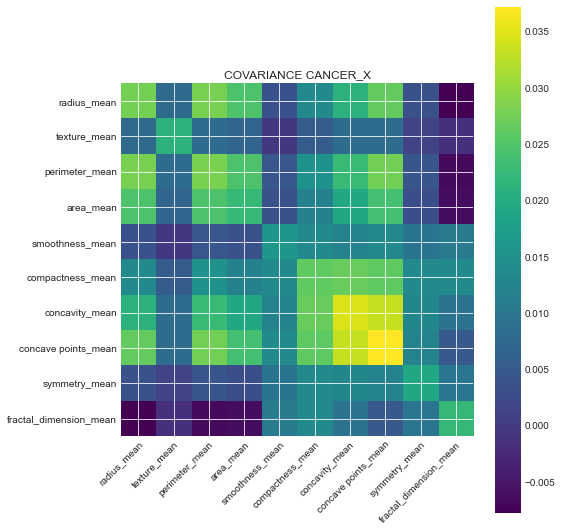

'plt.imshow(cov_mat, cmap=\'viridis\')\nheaders = print_headers(cancer_x)\nplt.set_xticks(range(headers))\nplt.set_xticklabels(headers)\nplt.colorbar()\nplt.title("COVARIANCE CANCER_X")\nplt.show()'

In [36]:
cov_mat = cancer_x.cov()
#print(cov_mat)

fig, ax = plt.subplots()
im = ax.imshow(cov_mat, cmap='viridis')

headers = print_headers(cancer_x)

ax.set_xticks(np.arange(len(headers)), labels=headers)
ax.set_yticks(np.arange(len(headers)), labels=headers)

ax.set_title("COVARIANCE CANCER_X")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

cbar = ax.figure.colorbar(im, ax=ax)

fig.tight_layout()
plt.show()

"""plt.imshow(cov_mat, cmap='viridis')
headers = print_headers(cancer_x)
plt.set_xticks(range(headers))
plt.set_xticklabels(headers)
plt.colorbar()
plt.title("COVARIANCE CANCER_X")
plt.show()"""

## Task 3: Visualizing Principle Component Analysis

### 3a) Principle Component Analysis
1. Use [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) to compute the eigenvalues and right eigenvectors of the covariance matrix.  
1. Print the eigen_values and the first 2 eigenvectors.
2. Transform the data with the eigen_vectors.
    1. Matrix multiply cancer_x with the first two columns of the eigen_vectors. 
    2. Print the first 5 rows of the transformed data.

**Question:**  Which 2 variables are the first eigenvector most dependent on?  How does that relate to the heatmap?

In [56]:
evalue, evect = np.linalg.eig(cov_mat)

#print(evalue)
print (evect[[0,1],:])

#creates homogenous matrix

dsTransformed = np.matmul(cancer_x,evect[[0,1],:].T )

print(dsTransformed)
#print(dsTransformed0)

print('''
-----------------------------------
Your results should look like this:
-----------------------------------
Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.746755
1 -1.105772  0.158411
2 -1.479314 -0.159259
3 -1.335070 -1.286536
4 -1.364975 -0.036868
-----------------------------------
''')

[[-0.36654  0.33267 -0.1101   0.05021  0.05068  0.27529 -0.67136  0.4437
   0.11721  0.02564]
 [-0.1315   0.11754  0.96301  0.06541  0.18998  0.01439  0.00029  0.00465
  -0.00662  0.02945]]
            0         1
0   -0.028854  0.624815
1   -0.056753  0.634292
2    0.047738  0.679721
3    0.255865  0.439092
4   -0.138431  0.667526
..        ...       ...
564 -0.082862  0.759688
565  0.062654  0.689112
566  0.096861  0.524243
567  0.054933  0.800212
568  0.207445  0.087442

[569 rows x 2 columns]

-----------------------------------
Your results should look like this:
-----------------------------------
Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.7

### 3b) Graph a scatterplot of the transformed data

Graph a scatterplot of the transformed data using [plt.scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.scatter.html)
1. Scatter Parameters
    1. Graph the first principle component on the x axis (first column of the tranformed data)
    2. Graph the second principle component on the y axis (second column of the tranformed data)
    3. Use the `cancer_y` series for the color with a black edgecolor
3. Include a title, and axis labels.
4. Add a custom [legend](https://matplotlib.org/3.3.3/tutorials/intermediate/legend_guide.html) using mpatches.
    1. Create 1 patch with the color `m` for malignant
    1. Create 1 patch with the color `b` for benign

0     -0.028854
1     -0.056753
2      0.047738
3      0.255865
4     -0.138431
         ...   
564   -0.082862
565    0.062654
566    0.096861
567    0.054933
568    0.207445
Name: 0, Length: 569, dtype: float64


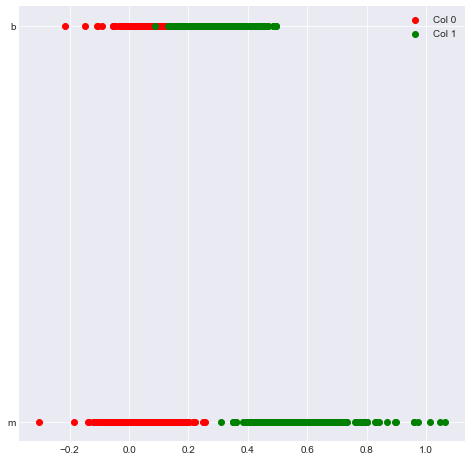

In [62]:
import matplotlib.patches as mpatches


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = dsTransformed[0]
print(x)

plt.scatter(x,cancer_y, c = 'r', label='Col 0')
plt.scatter(dsTransformed[1],cancer_y, c = 'g', label='Col 1')

plt.legend(loc='upper right')

plt.show()